To detect negative speech in tweets. Here we are gonna train and develop a simple Twitter Sentiment Analysis supervised learning model using python and NLP libraries. This model will be able to detect the sentiment behind the given tweet.

## Dataset : 
The data set contains tweets and sentiment related to it. Here we need to predict the sentiment for a given tweet.
Here, in label 
* __label “0”: Positive Sentiment__ 
* __label “1”: Negative Sentiment__  

* __nltk__ : Natural Language Tool Kit is a natural language processing library that contains packages to make machines understand human language and reply to it with an appropriate response.
* __Pandas__ : For analysis and manipulation of data 
* __Numpy__ : To handle matrices and arrays of large size
* __Sklearn__ : To easily handle machine learning operations
* __Pickle__ : It is an object serializer and we are using it to save our model.
* __Seaborn__ : For statistical data visualization.
* __re__ : To use regular expressions

In [14]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import nltk
import re
import seaborn
import warnings  # To ignore warnings
warnings.filterwarnings('ignore')
import IPython # To diplay images
import texttable as tt  # To print data in tabular format

## Step 2: Import datasets

Read the data with pandas.
* __twitter_data.csv__ : It contains tweets with its corresponding sentiment. We'll use this to train as well as test our model to predict the sentiment behind the tweet.

In [15]:
try:
    data  = pd.read_csv("Dataset/twitter_data.csv")
except FileNotFoundError:
    print("File does not exist!")

In [16]:
print("First 5 observations from the data : ")
print(data.head())

First 5 observations from the data : 
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [17]:
data.shape

(31962, 3)

Here, 31962 is the number of observations data set, and 3 is the number of columns in the data set.

In [18]:
data.to_csv('CSVs/01_original_data.csv')

### Hashtags
The graph shows normal tweets. Check the top 20 most used hashtags and plot them according to their frequency.
- Following is the graphical representation for the most occurred hashtags in data with positive sentiment.
- __Hashtag__ : A word or phrase preceded by a hash sign (#), used on social media websites and applications, especially Twitter, to identify messages on a specific topic.

In [19]:
#Select all words from normal tweet
normal_words = ' '.join([word for word in data['tweet'][data['label'] == 0]])
#Collect all hashtags
pos_htag = [htag for htag in normal_words.split() if htag.startswith('#')]
#Remove hashtag symbol (#)
pos_htag = [pos_htag[i][1:] for i in range(len(pos_htag))]
#Count frequency of each word
pos_htag_freqcount = nltk.FreqDist(pos_htag)
pos_htag_df = pd.DataFrame({'Hashtag' : list(pos_htag_freqcount.keys()),
                            'Count' : list(pos_htag_freqcount.values())})

[Text(0, 0.5, 'Count')]

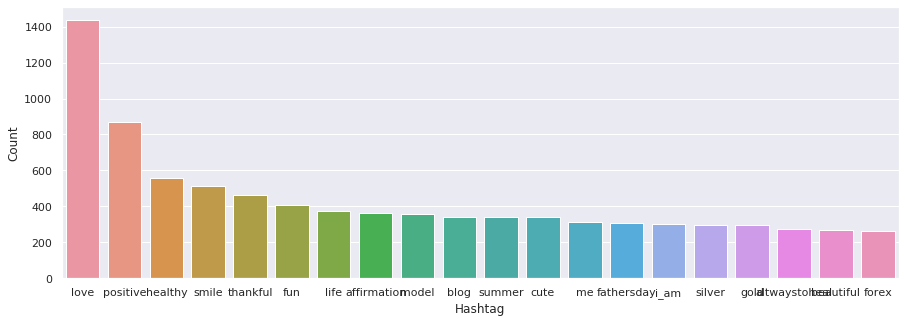

In [20]:
#Select top 20 most frequent hashtags and plot them 
most_frequent = pos_htag_df.nlargest(columns="Count", n = 20) 
seaborn.set(rc={'figure.figsize':(15,5)})
ax = seaborn.barplot( data=most_frequent, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')

The graph shows negative tweets. In negative tweets, 20 hashtags that appeared the most are shown in graph.
- Following is the graphical representation for the most occurred hashtags in data with negative sentiment.




In [21]:
#Repeat same steps for negative tweets
negative_words = ' '.join([word for word in data['tweet'][data['label'] == 1]])
neg_htag = [htag for htag in negative_words.split() if htag.startswith('#')]
neg_htag = [neg_htag[i][1:] for i in range(len(neg_htag))]
neg_htag_freqcount = nltk.FreqDist(neg_htag)
neg_htag_df = pd.DataFrame({'Hashtag' : list(neg_htag_freqcount.keys()),
                            'Count' : list(neg_htag_freqcount.values())})

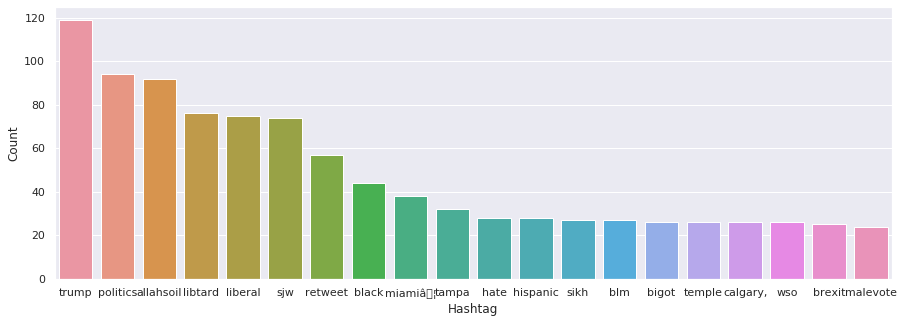

In [22]:
most_frequent = neg_htag_df.nlargest(columns="Count", n = 20) 
seaborn.set(rc={'figure.figsize':(15,5)})
ax = seaborn.barplot(data=most_frequent, x= "Hashtag", y = "Count")


- From both plots, we can conclude that hashtags are very important for sentiment analysis and should not be ignored.
- Words used like love, friend, happy are used in positive tweets whereas negative can be found in words like trump, black, politics, etc.

## Step 3 : Data cleaning and Preprocessing

### __Lemmating__ and __Tokenization__

In data cleaning, we remove the unwanted contents from data so that we can get better accuracy. 
Here we are converting each word in its root form. Some times we want our program to recognize that the words “register” and “registration” are just different tenses of the same verb, like for example, we have two questions "How do I register for BridgeLabz?" and "What is the registration processing for BridgeLabz?". Here we want our program to know that registration and register are the same so their answers are also the same, and that's the reason why we lemmatize.

* First we'll tokenize each word from the dataset.
- __Tokenizing__ : This breaks up the strings into a list of words or pieces based on a specified pattern using Regular Expressions aka RegEx. 
- eg : white brown fox = ‘white’, ‘brown’, ’fox’

* After we tokenize, we will start cleaning up the tokens by Lemmatizing. 
- __Lemmatizing__ : Lemmatizing is the process of converting a word into its root form.
- e.g., "Playing", "Played" = "play".

In [23]:
def lemmatization(data):

    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.remove('no')
    stop_words.remove('not')
    lemma_function = nltk.stem.wordnet.WordNetLemmatizer()
    
    tokenizer = nltk.tokenize.TweetTokenizer()
    sentence = []
    for text in data:
        lemma = []
        text = ' '.join(re.sub("(@[A-Za-z0-9]+)"," ",text).split())
        tokens = tokenizer.tokenize(text) 
        for token in tokens:
            if token not in stop_words:
                lemma.append(lemma_function.lemmatize(token))
        sentence.append(" ".join(lemma))

    return sentence

In [24]:
cleaned_tweet = lemmatization(list(data['tweet']))

- Add the cleaned data to the data frame.

In [25]:
data['cleaned_tweet'] = cleaned_tweet

In [26]:
print("Original tweet ::\n  ",data['tweet'].iloc[1])
print('='*90)
print("Cleaned tweet ::\n  ",data['cleaned_tweet'].iloc[1])

Original tweet ::
   @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Cleaned tweet ::
   thanks #lyft credit can't use cause offer wheelchair van pdx . #disapointed #getthanked


## Step 3: Split data into train and test datasets
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate our model is.
* Here we are spliting the data so that the training dataset contains 80% of the data and test dataset contains 20% of the total data.
* __test_size__ : Here we specify the size we want for our test dataset.
* __random_state__ : When we use a random number generator for number or sequence generation, we give a  starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split(). 

In [30]:
train_features, test_features, train_labels, test_labels = sklearn.model_selection.train_test_split(data['cleaned_tweet'], 
                                                                                                    data['label'], 
                                                                                                    random_state = 42,
                                                                                                    test_size = 0.2)

After splitting, the size of the train and test data sets are:

In [31]:
def display_shapes():
    tab = tt.Texttable()
    namespace = globals()
    headings = ['Name','Shape']
    variable_names = ['feature_train', 'feature_test', 'label_train', 'label_test']
    tab.header(headings)
    for name in variable_names:
        tab.add_row([name, eval(name).shape])
    return print(tab.draw())

display_shapes()

+---------------+----------+
|     Name      |  Shape   |
+===============+==========+
| feature_train | (25569,) |
+---------------+----------+
| feature_test  | (6393,)  |
+---------------+----------+
| label_train   | (25569,) |
+---------------+----------+
| label_test    | (6393,)  |
+---------------+----------+


In [32]:
train_features.to_csv('CSVs/02.1_train_features.csv')
train_labels.to_csv('CSVs/02.2_train_labels.csv')
test_features.to_csv('CSVs/02.3_test_features.csv')
test_labels.to_csv('CSVs/02.4_test_labels.csv')

# Step 4 : Model Creation

## Applying Bag-of-Words

 - Bag of words is nothing but a collection of all the unique words along with its number of occurrences in our dataset. It is AKA Corpus.
 - As the machine can't understand text data, we need to convert it in numeric form. So we count the occurrence of each word and save it. This is our bag of words.
 - __Approaches build Bag of Words__:
     - 1. Count Occurrence:
     - 2. TF-IDF

# __CountVectorizer__
Counting word occurrence. The reason behind using this approach is that keyword or important signal will occur again and again. So if the number of occurrences represents the importance of the word. More frequency means more importance.

In [33]:
cv = sklearn.feature_extraction.text.CountVectorizer()
cv.fit(train_features)
test_features_vectorized = cv.transform(test_features)
print('Total Features =', len(cv.get_feature_names()))
train_features_vectorized = cv.transform(train_features)

Total Features = 34666


In [34]:
test_features_vectorized, train_features_vectorized

(<6393x34666 sparse matrix of type '<class 'numpy.int64'>'
 	with 43715 stored elements in Compressed Sparse Row format>,
 <25569x34666 sparse matrix of type '<class 'numpy.int64'>'
 	with 194577 stored elements in Compressed Sparse Row format>)

In [79]:
pd.DataFrame([cv.vocabulary_]).T.to_csv('CSVs/03_cv_Vocabulary.csv')

- Here we are going to apply two algorithms on our data

## __Logistic Regression__


- Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 
- In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).
- It is a predictive analysis algorithm and based on the concept of probability.
- Logistic regression transforms its output using the logistic sigmoid function to return a probability value.
- We use sigmoid function as it always returns a value between 0 and 1.
- Hence, in order to map predicted values to probabilities, we use the sigmoid function. 
- The function maps any real value into another value between 0 and 1. 
- In machine learning, we use sigmoid to map predictions to probabilities.

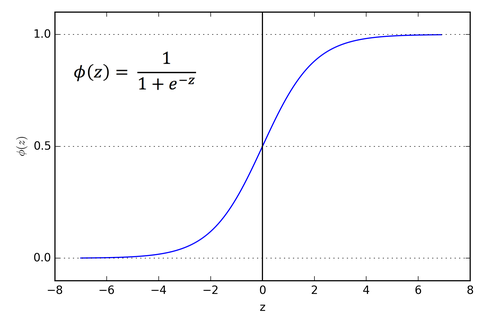

In [71]:
IPython.display.Image("images/sigmoid_function.png")

- s(z) = output between 0 and 1 (probability estimate)
- z = input to the function (your algorithm’s prediction e.g. mx + b)
- e = base of natural log

__Decision Boundary:__
- To predict which class a data belongs, a threshold can be set. Based upon this threshold, the classes are divided
- In above figure, we can see that the decision boundery is set as 0.5, which means if the value of our sigmod function for any observation is below 0.5, we'll consider it as 0 and if greater than or equal to 0.5, we'll consider it as 1. 

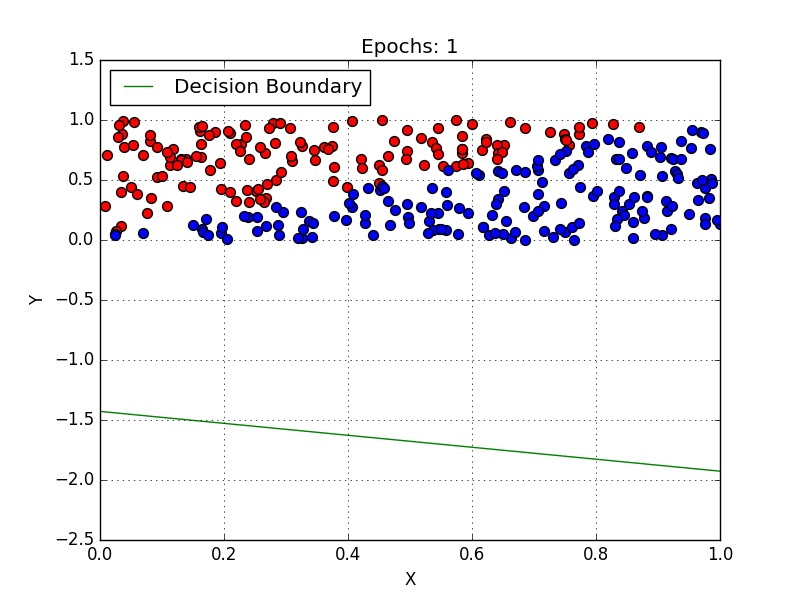

In [72]:
IPython.display.Image("images/decidion_boundary.gif")

- This fits perfectly when we have 2 categorical variables, but what if we have multiple categorical variables?
- In this case we'll go for Multivariate Logistic Regression
- Multivariate Logistic Regression is based on conditional probability.

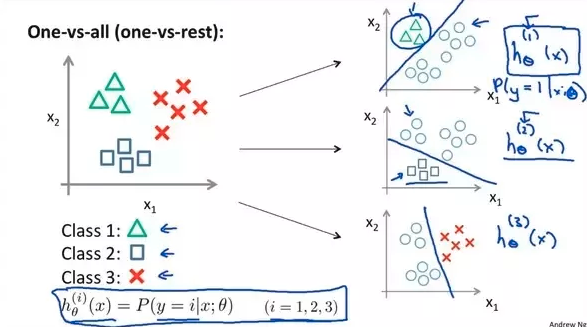

In [73]:
IPython.display.Image("images/Multivariate_Logistic_Regression.png")

- In the above Multi Class classification example, there are 3 classes. 
- Hence, we need to train 3 different logistic regression classifiers.
    - When training the classifier for Class 1, we will treat input data with class 1 labels as +ve samples (y==1) and all other classes as -ve samples (y==0).
    - When training the classifier for Class 2, we will treat input data with class 2 labels as +ve samples (y==1) and all other classes as -ve samples (y==0).
    - This will continue for all the classes.

__Now let's train our model__

In [36]:
logistic_model_cv = sklearn.linear_model.LogisticRegression()
logistic_model_cv.fit(train_features_vectorized, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict using our model

__Prediction phase: One vs all prediction__
- Once training all our classifiers, we can now use it to predict which class the test data belongs to.
- For the test input, we should check the “probability” that it belongs to each class using the trained logistic regression. 
- Your one-vs-all prediction function will pick the class for which the corresponding logistic regression outputs the highest probability and return the class label (1, 2,..., or N) as the prediction for the input example.


In [37]:
pred = logistic_model_cv.predict(test_features_vectorized)

In [38]:
print('Accuracy_score :', sklearn.metrics.accuracy_score(test_labels, pred))

Accuracy_score : 0.9588612544971062


- ### Confusion matrix:
Now, up to here we have done data cleaning, pre-processing, feed it to the algorithm, got our outputs with 96% accuracy, but what about effectiveness of our model. Better the effectiveness, better the performance and that are exactly what we want. So to check the effectiveness of our model we need to check all the predictions and compare them. Here confusing matrix comes in the picture. Confusion Matrix is a performance measurement for machine learning classification. 

In [66]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='images/confussion_matrix_1.png'></td><td><img src='images/confussion_matrix.png'></td></tr></table>"))

,


- True Positive:
    - Interpretation: You predicted positive and it’s true.
    - You predicted that a woman is pregnant and she actually is.
- True Negative:
    - Interpretation: You predicted negative and it’s true.
    - You predicted that a man is not pregnant and he actually is not.
- False Positive: (Type 1 Error)
    - Interpretation: You predicted positive and it’s false.
    - You predicted that a man is pregnant but he actually is not.
- False Negative: (Type 2 Error)
    - Interpretation: You predicted negative and it’s false.
    - You predicted that a woman is not pregnant but she actually is.

In [39]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5892,   45],
       [ 218,  238]])

- __Recall__ : Out of all the positive classes, how much we predicted correctly. It should be high   as possible.

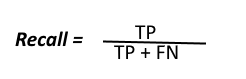

In [40]:
IPython.display.Image("images/recall.png")

- __Precision__ : Out of all the positive classes we have predicted correctly, how many are actually positive.

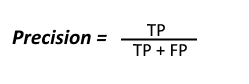

In [41]:
IPython.display.Image("images/precision.png")

- __F1_measure__ : It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. 

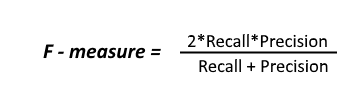

In [42]:
IPython.display.Image("images/f1_score.png")

In [43]:
f1_score_logistic_cv = sklearn.metrics.f1_score(test_labels, pred)
print('F1 :', f1_score_logistic_cv)

F1 : 0.6441136671177267


- ### Confusion Matrix :

In [44]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5892,   45],
       [ 218,  238]])

- ### Save model for Logistic regrssion:

In [74]:
with open('model/count_vectorizer/logistic_model.pkl', 'wb') as file:
    pickle.dump(cv, file)
    pickle.dump(logistic_model_cv, file)

## __SVM:__

- SVM is a supervised machine learning algorithm which can be used for classification or regression problems. 
- It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs. 
- Simply put, it does some extremely complex data transformations, then figures out how to separate your data based on the labels or outputs you've defined.

In [46]:
SVM_cv = sklearn.svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_cv.fit(train_features_vectorized, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- ### Predict values using our model:
    - Here we'll make predictions on vectorized test features

In [47]:
pred = SVM_cv.predict(test_features_vectorized)

- ### Calculate f1 score
     - F-score helps to measure test's accuracy for classification type of problems

In [48]:
f1_score_svm_cv = sklearn.metrics.f1_score(test_labels, pred)
print('F1 :', f1_score_svm_cv)

F1 : 0.7014563106796117


- ### Confusing Matrix

In [49]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5858,   79],
       [ 167,  289]])

- ### Save model for SVM:

In [50]:
with open('model/count_vectorizer/svm_model.pkl', 'wb') as file:
    pickle.dump(cv, file)
    pickle.dump(SVM_cv, file)

Logistic Regression performed well then Naive Bayes for the default parameters. Thus, we will be using only Logistic Regression ahead.

# __Tfidf__

- TF-IDF take another approach which is believe that high frequency may not able to provide much information gain. In another word, rare words contribute more weights to the model.
- Word importance will be increased if the number of occurrence within same document (i.e. training record). On the other hand, it will be decreased if it occurs in corpus (i.e. other training records).
- In simple words it stores the important words which might be used less but gives us more better features and stores the frequency of the words.

# __WHICH ONE TO KEEP__

- This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

- TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

- Let’s have a look at the important terms related to TF-IDF:

    - TF = (Number of times term t appears in a document)/(Number of terms in the document)
    - IDF = log(N/n), where, N is the number of documents and n is the number of documents a               term t has appeared in.
    - TF-IDF = TF*IDF

# __OR__

- Here we are dealing with text data, we can understant it but our machines can't. So we need to convert the data from text to numeric form.  
- Vectorization :The process of converting NLP text into numbers is called vectorization in ML.
- TF-IDF : TF-IDF stands for term frequency-inverse document frequency. It tell how important a word is in a sentence. The importance of a word depends on the number of times it occured in a sentence. To understand it, let's see each term:
- __Term Frequency(TF)__ : How frequently a word appears in a sentence. We can measure it by an equation, 

- TF = __(Total number of times the word "W" occured in the sentence) / (Total number of words in the sentence)__
- __Inverse Document Frequency (IDF)__ : How common is a word across all the sentences.
- IDF = __log( (Total number of sentences) / (Number of sentences with word "W" in it))__
* Apply vecorization on the cleaned questions
* Here we have used tfidf vectorizer
* It’ll see the unique words in the complete para or content given to it and then does one hot encoding accordingly. Also it removes the stopwords and stores the important words which might be used less but gives us more better features. And stores the frequency of the words.

In [76]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
tf = sklearn.feature_extraction.text.TfidfVectorizer()
tf.fit(train_features)
test_features_vectorized = tf.transform(test_features)
print('Total Features =', len(tf.get_feature_names()))
train_features_vectorized = tf.transform(train_features)

Total Features = 34666


In [78]:
pd.DataFrame([tf.vocabulary_]).T.to_csv('CSVs/03_TFIDF_Vocabulary.csv')

## __Logistic Regression__

In [52]:
logistic_model_tf = sklearn.linear_model.LogisticRegression()
logistic_model_tf.fit(train_features_vectorized, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

- ### Predict values using our model:
- Here we'll make predictions on vectorized test features

In [53]:
pred = logistic_model_tf.predict(test_features_vectorized)

- ### Calculate f1 score
 F-score helps to measure test's accuracy for classification type of problems

In [54]:
f1_score_logistic_tfidf = sklearn.metrics.f1_score(test_labels, pred)
print('F1 :', f1_score_logistic_tfidf)

F1 : 0.4607843137254902


- ### Confusion Matrix

In [55]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5922,   15],
       [ 315,  141]])

- ### Save model for SVM:

In [56]:
with open('model/TF-IDF/logistic_model.pkl', 'wb') as file:
    pickle.dump(cv, file)
    pickle.dump(logistic_model_tf, file)

## __SVM__

In [57]:
SVM_tf = sklearn.svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_tf.fit(train_features_vectorized, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- ### Predict values usin our model:
    - Here we'll make predictions on vectorized test features

In [58]:
pred = SVM_tf.predict(test_features_vectorized)

- ### Calculate f1 score
     - F-score helps to measure test's accuracy for classification type of problems

In [59]:
f1_score_svm_tfidf = sklearn.metrics.f1_score(test_labels, pred)
print('F1 :', f1_score_svm_tfidf)

F1 : 0.644718792866941


- ### Confusion Matrix

In [60]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5899,   38],
       [ 221,  235]])

- ### Save model for SVM:

In [61]:
with open('model/TF-IDF/svm_model.pkl', 'wb') as file:
    pickle.dump(cv, file)
    pickle.dump(SVM_tf, file)

## Compare f1 score for all the algorithms

In [62]:
def compare_f1_score():
    tab = tt.Texttable()
    headings = ['Algorithm','f1_score']
    variable_names = ['f1_score_logistic_cv', 'f1_score_svm_cv', 'f1_score_logistic_tfidf', 'f1_score_svm_tfidf']
    tab.header(headings)

    for name in variable_names:
        algorithm = name.split('_')[2] + " " + name.split('_')[3]
        tab.add_row([algorithm, eval(name)])
    return print(tab.draw())

compare_f1_score()

+----------------+----------+
|   Algorithm    | f1_score |
+================+==========+
| logistic cv    | 0.644    |
+----------------+----------+
| svm cv         | 0.701    |
+----------------+----------+
| logistic tfidf | 0.461    |
+----------------+----------+
| svm tfidf      | 0.645    |
+----------------+----------+


# __Summary:__ 

This problem has been created to help people understand the complete process of machine learning modeling and basics of NLP. These steps ensure that you will get the complete idea about how to clean the data , what are the different approaches towards building a model and how to the model makes its predictons on live data. We also compared all the algorithms and saw which one will give the better performance and used it to make predictions on live data.